# Monomial interpolation

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as pt
%matplotlib inline

In [2]:
x = np.linspace(0, 1, 200)

Now plot the monomial basis on the interval [0,1] up to $x^9$.

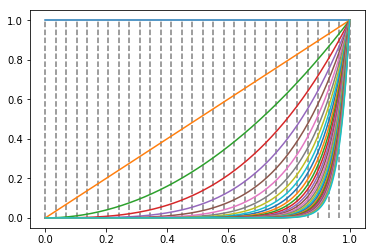

In [5]:
n =30

for i in range(n):
    pt.plot(x, x**i)
    
pt.vlines(np.linspace(0, 1, n), 0, 1, alpha=0.5, linestyle="--")

* How do the entries of the Vandermonde matrix relate to this plot?

------------------
* Guess the condition number of the Vandermonde matrix for $n=5,10,20$:

In [8]:
n = 30

x = np.linspace(0, 1, n)

V = np.zeros((n, n))
for i in range(n):
    V[:, i] = x**i

la.cond(V)

3.8637169602590628e+18

## Practical Impact

Is there really a practical impact to this? Let's find out by plotting the error in an interpolant:

In [25]:
n = 20


def f(x):
    return np.sin(2*np.pi*x)

In [26]:
x = np.linspace(0, 1, n)

V = np.zeros((n, n))
for i in range(n):
    V[:, i] = x**i

coeffs = la.solve(V, f(x))
coeffs

array([  0.00000000e+00,   6.28318531e+00,   4.91571743e-09,
        -4.13417023e+01,   5.56423261e-07,   8.16052547e+01,
        -1.39373756e-04,  -7.67044568e+01,  -8.92732074e-03,
         4.20989029e+01,  -1.34568412e-01,  -1.47514459e+01,
        -6.75925318e-01,   4.85362470e+00,  -1.22623706e+00,
         4.01746907e-01,  -7.74504581e-01,   4.97162152e-01,
        -1.36593358e-01,   1.46232528e-02])

In [27]:
many_x = np.linspace(0, 1, 5000)
interp = 0
for i in range(n):
    interp += coeffs[i]*many_x**i    

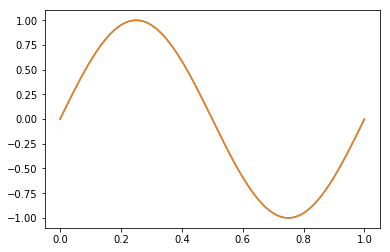

In [28]:
pt.plot(many_x, f(many_x))
pt.plot(many_x, interp)

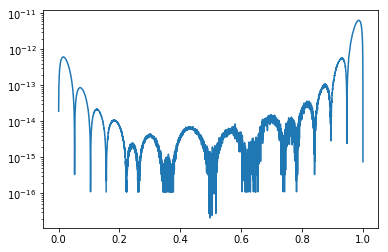

In [29]:
pt.semilogy(many_x, np.abs(interp - f(many_x)))

Observations?

In [ ]:
#clear
# Those fuzzy bits down there are the floating point error.
# In practice, results can be *much* better than condition number suggests--even "most of the time".
# Condition number bounds are *worst-case*.